In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 20,
    "legend.fontsize": 14,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [10]:
def import_npz1(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName+'1'] = Data[varName]
        
def import_npz2(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName+'2'] = Data[varName]

fname_static = ['../../data/flopping_spin/flopping_spin_static_spectrum_wq=0.6.npz', \
                 '../../data/flopping_charge/flopping_charge_static_spectrum_wq=0.49.npz']

fname_ad = ['../../data/flopping_spin/flopping_spin_floquet_spectrum_w_r=0.7.npz', \
            '../../data/flopping_charge/flopping_charge_floquet_spectrum_w_r=0.7.npz']

fname_diab = ['../../data/flopping_spin/flopping_spin_floquet_spectrum_w_r=1.4.npz', \
              '../../data/flopping_charge/flopping_charge_floquet_spectrum_w_r=1.4.npz']

wq = []
ref_static_notsc_notsf = []
ref_static_notsf = []
color_m_static = []
ref_static = []
Alist_spectrum = []

evals1 = []
evals2 = []

color_list1 = []
color_list2 = []

wr_list1 = []
wr_list2 = []

for i in range(2):
    data = np.load(fname_static[i-1], allow_pickle=True)
    data_ad = np.load(fname_ad[i-1], allow_pickle=True)
    data_diab = np.load(fname_diab[i-1], allow_pickle=True)

    wq.append(data['wq'])
    
    ref_static_notsc_notsf.append(data['ref_static_notsc_notsf'])
    ref_static_notsf.append(data['ref_static_notsf'])
    color_m_static.append(data['color_m_static'])
    ref_static.append(data['evals'])
    Alist_spectrum.append(data['e0_list'])

    wr_list1.append(data_ad['w_r'])
    wr_list2.append(data_diab['w_r'])

    evals1.append(data_ad['evals_list'][0])
    evals2.append(data_diab['evals_list'][0])

    color_list1.append(data_ad['color_m'])
    color_list2.append(data_diab['color_m'])
    
                            
evals = [evals1, evals2]
color_list = [color_list1, color_list2]


In [11]:
evals1[1][:,0]

array([-2.14322062, -2.14093294, -2.13866048, -2.13640339, -2.13416177,
       -2.13193578, -2.12972553, -2.12753116, -2.12535281, -2.12319062,
       -2.12104472, -2.11891526, -2.11680238, -2.11470622, -2.11262693,
       -2.11056465, -2.10851953, -2.10649173, -2.1044814 , -2.10248869,
       -2.10051375, -2.09855675, -2.09661784, -2.09469718, -2.09279494,
       -2.09091128, -2.08904636, -2.08720036, -2.08537344, -2.08356577,
       -2.08177752, -2.08000888, -2.07826001, -2.0765311 , -2.07482231,
       -2.07313384, -2.07146586, -2.06981856, -2.06819212, -2.06658672,
       -2.06500257, -2.06343984, -2.06189872, -2.06037941, -2.05888209,
       -2.05740697, -2.05595423, -2.05452408, -2.0531167 , -2.0517323 ,
       -2.05037106, -2.0490332 , -2.0477189 , -2.04642836, -2.04516179,
       -2.04391938, -2.04270134, -2.04150785, -2.04033911, -2.03919533,
       -2.0380767 , -2.03698342, -2.03591567, -2.03487366, -2.03385757,
       -2.03286759, -2.03190391, -2.03096673, -2.03005621, -2.02

In [12]:
def get_color(colorRGBA1, colorRGBA2):
    alpha = 1 - ((1 - colorRGBA1[3]) * (1 - colorRGBA2[3]) / 255)
    red   = (colorRGBA1[0] * (1 - colorRGBA2[3]) + colorRGBA2[0] * colorRGBA2[3]) / 1
    green = (colorRGBA1[1] * (1 - colorRGBA2[3]) + colorRGBA2[1] * colorRGBA2[3]) / 1
    blue  = (colorRGBA1[2] * (1 - colorRGBA2[3]) + colorRGBA2[2] * colorRGBA2[3]) / 1
    return (np.round(red,3), np.round(green,3), np.round(blue,3), np.round(alpha,3))

from matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list(name='rbb',
	colors=['dodgerblue','white','tab:red'])

def colorFromBivariateData1(Z1,Z2,cmap1 = cmap):
    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    cmap_1 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap1)
    cmap_1.set_array([])
    
    Z1_color = np.array(cmap_1.to_rgba(Z1))
    
    Z1_color[3] = np.round(Z1_color[3]*(1-Z2),3)
    
    return Z1_color

from matplotlib.colors import ListedColormap

my_cmap=LinearSegmentedColormap.from_list(name='rbb2',
	colors=['purple','#2ab07f','gold'])

#my_cmap = plt.cm.viridis(np.arange(plt.cm.viridis.N))
#my_cmap[:,0:3] *= 1
#my_cmap = ListedColormap(my_cmap)

def colorFromBivariateData2(Z1,Z2,cmap2 = my_cmap):    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    cmap_2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap2)
    cmap_2.set_array([])
    
    Z2_color = np.array(cmap_2.to_rgba(Z1))
        
    Z2_color[3] = np.round(Z2_color[3]*Z2,3)
    
    return Z2_color

In [13]:
xx = np.linspace(0,100,num=40)/100
yy = np.linspace(0,100,num=40)/100

z_m = np.zeros((len(xx),len(yy)), dtype=object)

for i,elem_x in enumerate(xx):
    for j,elem_y in enumerate(yy):
            z_m[i,j]=get_color(colorFromBivariateData1(elem_x,elem_y),colorFromBivariateData2(elem_x,elem_y))

/tmp/ipykernel_11143/3329785374.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_11143/3329785374.py:170: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


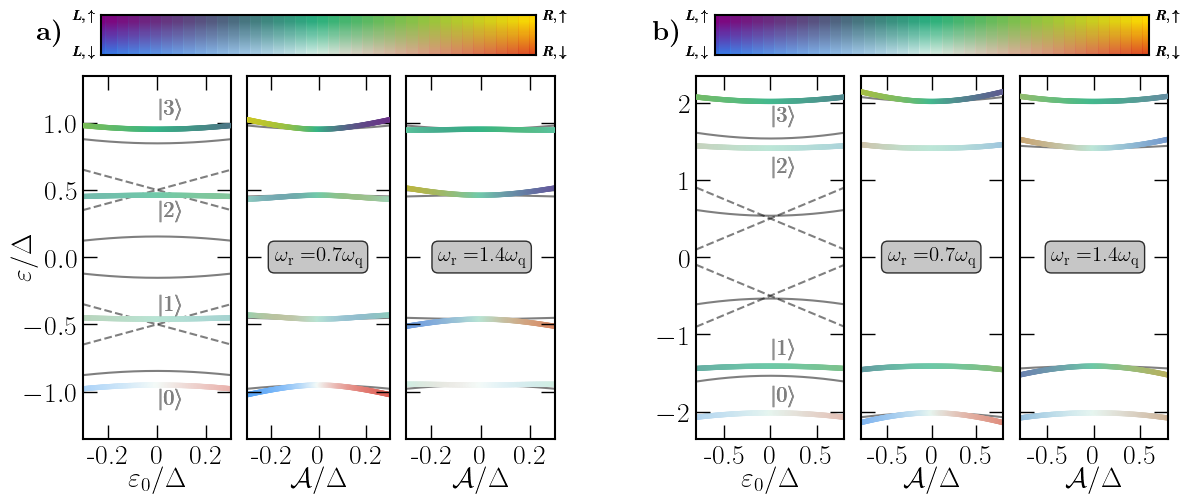

In [14]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(14,5.5), layout="constrained")

plt.rcParams.update({'font.size': 16})

gs00 = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1, 1], wspace=0.3)

gs000 = gs00[0,0].subgridspec(2, 5, width_ratios=[0.015, 1, 1.1, 1, 0.02], height_ratios=[0.1,0.9], hspace=0.1, wspace=0.2)

ax1 = fig.add_subplot(gs000[1, 0:2])
ax1_floquet_ad = fig.add_subplot(gs000[1, 2])
ax1_floquet_diab = fig.add_subplot(gs000[1, 3:5])

ax3 = fig.add_subplot(gs000[0, 1:4])

gs001 = gs00[0,1].subgridspec(2, 5, width_ratios=[0.015, 1, 1.1, 1, 0.02], height_ratios=[0.1,0.9], hspace=0.1, wspace=0.2)

ax2 = fig.add_subplot(gs001[1, 0:2])
ax2_floquet_ad = fig.add_subplot(gs001[1, 2])
ax2_floquet_diab = fig.add_subplot(gs001[1, 3:5])

ax3_floquet = fig.add_subplot(gs001[0, 1:4])

ax = [ax1, ax2]
ax_floquet_ad = [ax1_floquet_ad, ax2_floquet_ad]
ax_floquet_diab = [ax1_floquet_diab, ax2_floquet_diab]

###### Static spectrum ###################################
for idx in range(2):
    for i in range(4):
        ax[idx].plot(Alist_spectrum[idx], ref_static_notsc_notsf[idx][:,i], c='black', zorder=0, alpha=0.5, ls='--')
        ax[idx].plot(Alist_spectrum[idx], ref_static_notsf[idx][:,i], c='black', zorder=2, alpha=0.5)
        ax[idx].scatter(Alist_spectrum[idx], ref_static[idx][:,i], s=8, c=color_m_static[idx][i,:], zorder=i)
        
for i in range(2):
    ax[i].xaxis.set_tick_params(direction="in", which='both')
    ax[i].yaxis.set_tick_params(direction="in", which='both')

ax[0].set_ylim([-1.35,1.35])
ax[1].set_ylim([-2.35,2.35])

ax[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax[0].set_ylabel(r'$\varepsilon/\Delta$', labelpad=-10)
ax[0].set_xlabel(r'$\varepsilon_0/\Delta$', labelpad=-2)
ax[1].set_xlabel(r'$\varepsilon_0/\Delta$', labelpad=-2)

from matplotlib import patches
from matplotlib.patches import ConnectionPatch


for i,elem_x in enumerate(xx):
    for j,elem_y in enumerate(yy):
            ax3.scatter(elem_x, elem_y, facecolors=z_m[i,j], s=75, marker='s', edgecolors=z_m[i,j], antialiased=True)

ax3.set_aspect('auto')

ax3.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

######## Floquet spectrum ##########################
for idx in range(2):
    for i in range(4):
        ax_floquet_ad[idx].plot(Alist_spectrum[idx], ref_static[idx][:,i], c='black', zorder=0, alpha=0.5)
        ax_floquet_ad[idx].scatter(Alist_spectrum[idx], evals[0][idx][:,i], s=8, c=color_list[0][idx][i,:], zorder=i)

        ax_floquet_diab[idx].plot(Alist_spectrum[idx], ref_static[idx][:,i], c='black', zorder=0, alpha=0.5)
        ax_floquet_diab[idx].scatter(Alist_spectrum[idx], evals[1][idx][:,i], s=8, c=color_list[1][idx][i,:], zorder=i)

for i in range(2):
    ax_floquet_ad[i].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet_ad[i].yaxis.set_tick_params(direction="in", which='both')

    ax_floquet_diab[i].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet_diab[i].yaxis.set_tick_params(direction="in", which='both')

ax_floquet_ad[0].set_ylim([-1.35,1.35])
ax_floquet_diab[0].set_ylim([-1.35,1.35])

ax_floquet_ad[1].set_ylim([-2.35,2.35])
ax_floquet_diab[1].set_ylim([-2.35,2.35])

ax_floquet_ad[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_floquet_ad[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_floquet_diab[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_floquet_diab[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

#ax_floquet[0].set_ylabel(r'$\varepsilon/\Delta$', labelpad=-10)
ax_floquet_ad[0].set_xlabel(r'$\mathcal A/\Delta$', labelpad=-2)
ax_floquet_ad[1].set_xlabel(r'$\mathcal A/\Delta$', labelpad=-2)
ax_floquet_diab[0].set_xlabel(r'$\mathcal A/\Delta$', labelpad=-2)
ax_floquet_diab[1].set_xlabel(r'$\mathcal A/\Delta$', labelpad=-2)


for i,elem_x in enumerate(xx):
    for j,elem_y in enumerate(yy):
            ax3_floquet.scatter(elem_x, elem_y, facecolors=z_m[i,j], s=75, marker='s', edgecolors=z_m[i,j], antialiased=True)

ax3_floquet.set_aspect('auto')

ax3_floquet.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False,
                  labelbottom=False, labelright=False, labeltop=False, which='both')

############### Labels ##########################
labels = ['a)','b)','c)','d)']
ax[0].text(-0.32, 1.1, r'\bf{'+labels[0]+'}', size=20, color='black', transform=ax[0].transAxes)
ax[1].text(-0.3, 1.1, r'\bf{'+labels[1]+'}', size=20, color='black', transform=ax[1].transAxes)

ax3.text(-0.015,1.15,r'$\pmb{L,\uparrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)
ax3.text(1.07,1.15,r'$\pmb{R,\uparrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)
ax3.text(-0.015,0.26,r'$\pmb{L,\downarrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)
ax3.text(1.07,0.26,r'$\pmb{R,\downarrow}$', ha='right', va='top', transform=ax3.transAxes, color = 'black', \
        fontsize=10)

ax3_floquet.text(-0.015,1.15,r'$\pmb{L,\uparrow}$', ha='right', va='top', transform=ax3_floquet.transAxes, color = 'black', \
        fontsize=10)
ax3_floquet.text(1.07,1.15,r'$\pmb{R,\uparrow}$', ha='right', va='top', transform=ax3_floquet.transAxes, color = 'black', \
        fontsize=10)
ax3_floquet.text(-0.015,0.26,r'$\pmb{L,\downarrow}$', ha='right', va='top', transform=ax3_floquet.transAxes, color = 'black', \
        fontsize=10)
ax3_floquet.text(1.07,0.26,r'$\pmb{R,\downarrow}$', ha='right', va='top', transform=ax3_floquet.transAxes, color = 'black', \
        fontsize=10)

ax[0].text(0.69,0.4,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'black', alpha=0.5)
ax[0].text(0.69,0.14,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'black', alpha=0.5)
ax[0].text(0.69,0.66,r'$\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'black', alpha=0.5)
ax[0].text(0.69,0.94,r'$\pmb{\left\vert 3 \right\rangle}$', ha='right', va='top', transform=ax[0].transAxes, color = 'black', alpha=0.5)

ax[1].text(0.69,0.28,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'black', alpha=0.5)
ax[1].text(0.69,0.15,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'black', alpha=0.5)
ax[1].text(0.69,0.78,r'$\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'black', alpha=0.5)
ax[1].text(0.69,0.92,r'$\pmb{\left\vert 3 \right\rangle}$', ha='right', va='top', transform=ax[1].transAxes, color = 'black', alpha=0.5)

ax_floquet_ad[0].text(0.8, 0.49, r'$\omega_{\text{r}}=$'+str(np.round(wr_list1[0]/wq[0],2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_ad[0].transAxes, size=15)
ax_floquet_ad[1].text(0.8, 0.49, r'$\omega_{\text{r}}=$'+str(np.round(wr_list1[1]/wq[1],2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_ad[1].transAxes, size=15)

ax_floquet_diab[0].text(0.8, 0.49, r'$\omega_{\text{r}}=$'+str(np.round(wr_list2[0]/wq[0],2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_diab[0].transAxes, size=15)
ax_floquet_diab[1].text(0.8, 0.49, r'$\omega_{\text{r}}=$'+str(np.round(wr_list2[1]/wq[1],2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_diab[1].transAxes, size=15)

ax[0].set_xticks([-0.2,0,0.2],['-0.2','0','0.2'])
ax_floquet_ad[0].set_xticks([-0.2,0,0.2],['-0.2','0','0.2'])
ax_floquet_diab[0].set_xticks([-0.2,0,0.2],['-0.2','0','0.2'])

ax[1].set_xticks([-0.5,0,0.5],['-0.5','0','0.5'])
ax_floquet_ad[1].set_xticks([-0.5,0,0.5],['-0.5','0','0.5'])
ax_floquet_diab[1].set_xticks([-0.5,0,0.5],['-0.5','0','0.5'])

plt.tight_layout()

fig.savefig('../figures/figS3.pdf', bbox_inches='tight')